In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(r"C:\Users\Kurra Sriharsha\Downloads\climate.csv.csv")

In [5]:
data

,time,latitude,longitude,HGT_prl,TMP_prl,TMP_2m,APCP_sfc,lat,lon
0,1990-01-01 00:00:00,0,0,5856.0586,291.37073,300.59620,0.226562,5.04,65.04
1,1990-01-01 00:00:00,0,1,5855.0586,290.87073,300.47120,0.070312,5.04,66.12
2,1990-01-01 00:00:00,0,2,5854.0586,290.99573,300.65870,0.039062,5.04,67.20
3,1990-01-01 00:00:00,0,3,5856.0586,290.74573,300.31494,0.140625,5.04,68.28
4,1990-01-01 00:00:00,0,4,5856.0586,290.87073,300.50244,0.007812,5.04,69.36
...,...,...,...,...,...,...,...,...,...
46379003,2020-12-31 18:00:00,31,27,5596.0337,272.47275,251.79704,0.000000,38.52,94.20
46379004,2020-12-31 18:00:00,31,28,5592.0337,272.01962,245.04704,0.000000,38.52,95.28
46379005,2020-12-31 18:00:00,31,29,5581.0337,270.06650,251.29704,0.000000,38.52,96.36
46379006,2020-12-31 18:00:00,31,30,5577.5337,270.01962,250.14080,0.000000,38.52,97.44


In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46379008 entries, 0 to 46379007
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       object 
 1   latitude   int64  
 2   longitude  int64  
 3   HGT_prl    float64
 4   TMP_prl    float64
 5   TMP_2m     float64
 6   APCP_sfc   float64
 7   lat        float64
 8   lon        float64
dtypes: float64(6), int64(2), object(1)
memory usage: 3.1+ GB


,latitude,longitude,HGT_prl,TMP_prl,TMP_2m,APCP_sfc,lat,lon
count,4.637901e+07,4.637901e+07,4.637901e+07,4.637901e+07,4.637901e+07,4.637901e+07,4.637901e+07,4.637901e+07
mean,1.550000e+01,1.550000e+01,5.825715e+03,2.917404e+02,2.925953e+02,9.307187e-01,2.178000e+01,8.178000e+01
std,9.233093e+00,9.233093e+00,6.906869e+01,5.832473e+00,1.429415e+01,3.120312e+00,9.971740e+00,9.971740e+00
min,0.000000e+00,0.000000e+00,5.358822e+03,2.501036e+02,2.179969e+02,0.000000e+00,5.040000e+00,6.504000e+01
25%,7.750000e+00,7.750000e+00,5.809663e+03,2.897806e+02,2.859666e+02,0.000000e+00,1.341000e+01,7.341000e+01
50%,1.550000e+01,1.550000e+01,5.850932e+03,2.920625e+02,2.995959e+02,0.000000e+00,2.178000e+01,8.178000e+01
75%,2.325000e+01,2.325000e+01,5.868231e+03,2.943516e+02,3.015704e+02,4.218750e-01,3.015000e+01,9.015000e+01
max,3.100000e+01,3.100000e+01,5.960094e+03,3.179844e+02,3.263971e+02,6.052500e+02,3.852000e+01,9.852000e+01


In [7]:
# Check nulls and duplicates
print(data.isnull().sum())
print(f"Duplicates: {data.duplicated().sum()}")

time         0
latitude     0
longitude    0
HGT_prl      0
TMP_prl      0
TMP_2m       0
APCP_sfc     0
lat          0
lon          0
dtype: int64
Duplicates: 0


In [8]:
# Distribution plots
import matplotlib.pyplot as plt
import seaborn as sns


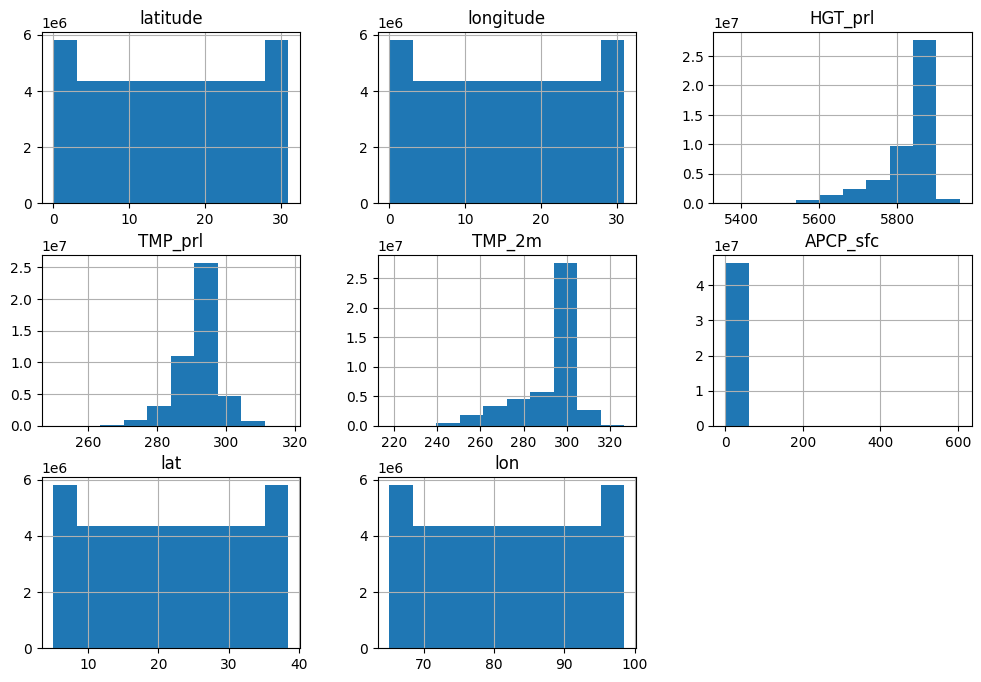

In [9]:
# Histograms
data.hist(figsize=(12,8))
plt.show()

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

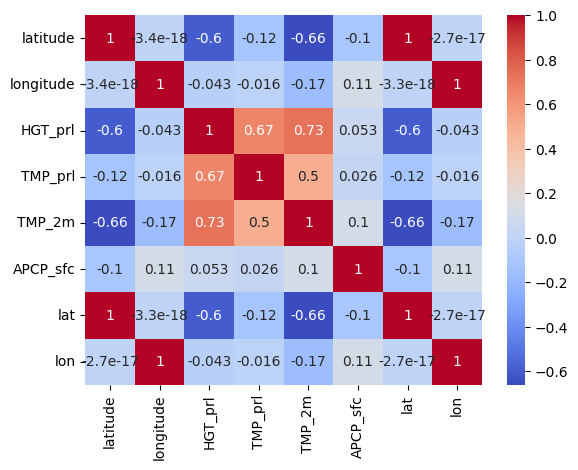

In [11]:
sns.heatmap(data.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap="coolwarm")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [13]:
# Example categorical encoding
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col].astype(str))

In [15]:
# Fill missing values
data.fillna(data.median(), inplace=True)

In [16]:
# Standardization
scaler = StandardScaler()
num_cols = data.select_dtypes(include=['int64','float64']).columns
data[num_cols] = scaler.fit_transform(data[num_cols])

In [17]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier


In [18]:
# Variance threshold
selector = VarianceThreshold(threshold=0.01)
data_reduced = selector.fit_transform(data)


In [19]:
# Define features and target
X = data.drop(['time', 'TMP_2m'], axis=1)   # all columns except time & target
y = data['TMP_2m']

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# ⚡ Take only 10,000 rows for faster training
sampled = data.sample(10000, random_state=42)

# Features (X) and Target (y)
X = sampled.drop(['time', 'TMP_2m'], axis=1)
y = sampled['TMP_2m']

# Train Random Forest (small model for speed)
model = RandomForestRegressor(
    n_estimators=50,   # fewer trees → faster
    max_depth=10,      # limit depth
    n_jobs=-1,         # use all CPU cores
    random_state=42
)
model.fit(X, y)

# Top 10 important features
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))


latitude     0.345414
lat          0.274848
TMP_prl      0.226473
lon          0.065227
longitude    0.064013
HGT_prl      0.017299
APCP_sfc     0.006726
dtype: float64


In [23]:
from sklearn.feature_selection import f_regression

# --- Feature Selection (Top 10) ---
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Get their scores
scores = selector.scores_[selector.get_support()]

# Make a DataFrame
feature_scores = pd.DataFrame({
    "Feature": selected_features,
    "Score": scores
}).sort_values(by="Score", ascending=False)

print("Top 10 Selected Features with Scores:")
print(feature_scores)


Top 10 Selected Features with Scores:
     Feature         Score
2    HGT_prl  11811.089381
0   latitude   7735.936091
5        lat   7735.936091
3    TMP_prl   3396.539309
1  longitude    263.187244
6        lon    263.187244
4   APCP_sfc     69.777314


C:\Users\Kurra Sriharsha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(
